<a href="https://colab.research.google.com/github/dinsor17/KKU_Data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ข้อ1

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/6zqwEf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
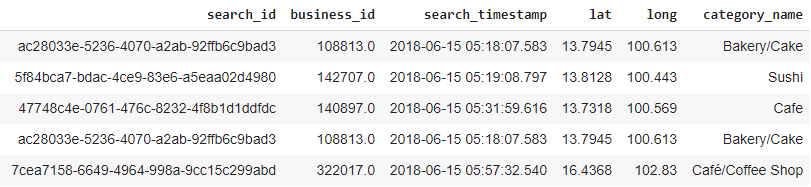

(200 คะแนน)

In [ ]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

###เรียกใช้ packages pandas

In [3]:
import pandas #แพนด้าจัดข้อมูลที่เป็นพวกตาราง

###Connect with Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


###Create path variables to store where is the data files

In [25]:
import os #นำเข้าไฟล์

In [58]:
#สร้างตัวแปรเก็บโฟลเดอร์ที่เราต้องการ
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')
reduced_marketbasket2 = os.path.join(path,'reduced_marketbasket2.csv')
search_request= os.path.join(path,'search_request.csv')

###Then use pandas to load the data into the environment

In [6]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head() #แสดงตาราง

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [7]:
search_click_df = pandas.read_csv(search_click)
search_click_df.head()

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,0,2018-06-15 05:11:38.914154,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2222397704154000,True
1,1,2018-06-15 06:30:51.277476,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,460838273476000,True
2,2,2018-06-15 06:32:09.558025,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2581491438025000,True
3,3,2018-06-15 06:00:59.820390,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1404578985390000,True
4,4,2018-06-15 05:23:36.828525,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,933358625525000,True


In [8]:
search_request_df = pandas.read_csv(search_request)
search_request_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


###To chack if the dimension of loaded data is correct as described in the description

In [13]:
search_click_df.shape

(7882037, 7)

In [14]:
w_restaurant_df.shape

(246847, 33)

In [15]:
search_request_df.shape

(10004357, 10)

###Missing Values

In [16]:
search_click_df.isnull()

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7882032,False,False,False,False,False,False,False
7882033,False,False,False,False,False,False,False
7882034,False,False,False,False,False,False,False
7882035,False,False,False,False,False,False,False


In [17]:
search_click_df.isnull().any()

Unnamed: 0          False
click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [18]:
search_click_df.isnull().any().any()

True

In [26]:
w_restaurant_df.isnull().any()

Unnamed: 0                 False
id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_rest

In [27]:
search_request_df.isnull().any()

Unnamed: 0          False
search_id           False
search_timestamp    False
user_agent          False
q                    True
user_id              True
session_id          False
number_of_result    False
lat                  True
long                 True
dtype: bool

วิธีที่ 1 ลบ missing ออกไปเลย

In [19]:
#คำสั่งลบmissing
search_click_df_nm = search_click_df.dropna()

In [20]:
search_click_df_nm.isnull().any().any()

False

In [21]:
print(search_click_df.shape) #เช็คดูข้อมูลว่ามีกี่แถวกี่หลัก
print(search_click_df_nm.shape)

(7882037, 7)
(7880121, 7)


ตรวจสอบว่า การลบข้อมูล missing ออก จากตาราง จะทำให้ข้อมูลลดลงกี่ %

In [22]:
size_before_drop = search_click_df.shape[0]  
size_after_drop = search_click_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} size after drop = {size_after_drop} \\
      \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 7882037 size after drop = 7880121 \      
which is 0.024308437019516654


In [30]:
size_before_drop = w_restaurant_df.shape[0]  
size_after_drop = w_restaurant_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} size after drop = {size_after_drop} \\
      \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 size after drop = 4 \      
which is 99.99837956304918


In [31]:
w_restaurant_df.isnull().any()

Unnamed: 0                 False
id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_rest

In [32]:
w_restaurant_df.dropna(subset=['id','name','price_range']).shape

(180972, 33)

วิธีที่2 เติมค่าที่เหมาะสม

In [23]:
#วิธีที่2 วิธีที่ฉลาดขึ้นมาอีกนิด  โดยที่ไม่ต้องลบทิ้งขวาง คือเติมค่าที่เหมาะสมลงไป
#เนาคือไม่มีอะไรเลย อิสเนาคือดูช่องว่างว่ามันมีอะไร
search_click_df[['search_id']] = search_click_df[['search_id']].fillna(0)
search_click_df[['business_id']] = search_click_df[['business_id']].fillna(0)

In [28]:
search_request_df[['q']] = search_request_df[['q']].fillna(0)
search_request_df[['user_id']] = search_request_df[['user_id']].fillna(0)
search_request_df[['lat']] = search_request_df[['lat']].fillna(0)
search_request_df[['long']] = search_request_df[['long']].fillna(0)

In [24]:
search_click_df.isnull().any()

Unnamed: 0          False
click_timestamp     False
search_id           False
business_id         False
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [29]:
search_request_df.isnull().any()

Unnamed: 0          False
search_id           False
search_timestamp    False
user_agent          False
q                   False
user_id             False
session_id          False
number_of_result    False
lat                 False
long                False
dtype: bool

วิธีที่ 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [34]:
w_restaurant_df[['name','city_name','avg_price']] #NaN=ช่องว่าง

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [35]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [41]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head() #ข้อมูลร้าน

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [44]:
selected_list = new_table['city_name']=='Khon Kaen'
selected_list

0         False
1         False
2         False
3         False
4         False
          ...  
246842    False
246843    False
246844    False
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [45]:
new_table[selected_list].head()

,name,city_name,avg_price
81,WISH CLINIC,Khon Kaen,NaN
317,Pomodoro,Khon Kaen,NaN
390,ครัวอรวรรณ,Khon Kaen,NaN
452,วาสนาเคียมห้วย,Khon Kaen,NaN
514,ส้มตำศิริพร,Khon Kaen,NaN


1.เลือกเฉพาะ กทม

In [47]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head() #ข้อมูลร้าน

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


2.ลบ missing

In [48]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


เลือกเฉพาะ column(ที่เราต้องการ) 'avg_price'

In [50]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

หาค่าเฉลี่ยของ avg_price

In [51]:
bkk_table_dp_avg_price.mean()

392.5854715094968

แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [52]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [53]:
bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [117]:
##การรวมกันเราจะใช้คำสั่งmerged 
##ตย.แบบแรกเอาสองตารางมาไว้ด้วยกันเลย
merged_table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id')
merged_table

,Unnamed: 0_x,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,Unnamed: 0_y,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,0,2018-06-15 05:11:38.914154,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2222397704154000,True,215557.0,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,2018-06-15 06:30:51.277476,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,460838273476000,True,115454.0,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0
2,2,2018-06-15 06:32:09.558025,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2581491438025000,True,9188.0,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,NaN,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
3,3,2018-06-15 06:00:59.820390,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1404578985390000,True,52161.0,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,NaN,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,4,2018-06-15 05:23:36.828525,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,933358625525000,True,129335.0,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882032,7882032,2018-06-28 01:59:10.893735,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,11,4366735000,True,9479.0,16614.0,CORO Field Cafe,1.0,0.0,Bangkok Metropolitan Region,10400,w4rw2d0,0.0,4.215156,NaN,220.0,47.0,2.0,27064.0,26.0,2.0,164.0,Healthy Food,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
7882033,7882033,2018-06-28 01:59:11.085196,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,11,4558196000,True,9479.0,16614.0,CORO Field Cafe,1.0,0.0,Bangkok Metropolitan Region,10400,w4rw2d0,0.0,4.215156,NaN,220.0,47.0,2.0,27064.0,26.0,2.0,164.0,Healthy Food,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
7882034,7882034,2018-06-28 06:49:02.493141,d086453d-7fde-4766-af39-8205f0f0a4aa,19569.0,11,16961141000,True,11406.0,19569.0,Fat Belly Pattaya,1.0,0.0,Chon Buri,20150,w4r9xzf,0.0,4.581871,NaN,221.0,34.0,0.0,17302.0,21.0,0.0,12.0,Cafe,3.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,0.0,NaN,NaN,0.0
7882035,7882035,2018-06-28 06:36:02.865507,d157eba1-15e6-4f7a-b090-27a311d976a0,227719.0,11,27917507000,True,158631.0,227719.0,The River Barn,1.0,0.0,Chachoengsao,24000,w4rvum7,0.0,3.375000,NaN,54.0,13.0,2.0,19395.0,4.0,0.0,22.0,Thai,3.0,NaN,3.0,0.0,1.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN


[PD] groupby()

In [120]:
search_click_df.groupby('business_id').count()

,Unnamed: 0,click_timestamp,search_id,display_position,time_diff_nanos,ads
business_id,,,,,,
0.0,1892,1892,1892,1892,1892,1892
2.0,21,21,21,21,21,21
4.0,9,9,9,9,9,9
5.0,19,19,19,19,19,19
6.0,61,61,61,61,61,61
...,...,...,...,...,...,...
340068.0,71,71,71,71,71,71
340070.0,32,32,32,32,32,32
340074.0,9,9,9,9,9,9


In [122]:
search_click_df.groupby('business_id').count().sort_values('click_timestamp')

,Unnamed: 0,click_timestamp,search_id,display_position,time_diff_nanos,ads
business_id,,,,,,
259549.0,1,1,1,1,1,1
156150.0,1,1,1,1,1,1
94385.0,1,1,1,1,1,1
31935.0,1,1,1,1,1,1
326906.0,1,1,1,1,1,1
...,...,...,...,...,...,...
331572.0,7309,7309,7309,7309,7309,7309
250135.0,7391,7391,7391,7391,7391,7391
112509.0,9124,9124,9124,9124,9124,9124


หาจังหวัดที่มีคน click เข้าไปมากที่สุดสามอันดับแรก

In [ ]:
search_click_df.groupby('city').count().sort_values('search_timestamp').iloc[-3:,:]

In [ ]:
#แบบเรียงจากมากไปน้อย
search_click_df.groupby('city').count().sort_values('search_timestamp',ascending=False).iloc[:3,:]

In [ ]:
search_click_df.groupby('city').count().sort_values('search_timestamp').iloc[-3:,:]

###สร้าง model เพื่อทำนาย (Classification)
Classification คือการจำแนกประเภท

     1. Import         แพ็คเกจ
     2. Dafine         นิยาม
     3. Train (fit)     สร้างโมเดล
     4. Test            ทำนาย
     5. Evaluate      วัดผลว่ามันดีแค่ไหน

##ข้อ2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/6zqwEf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

เรื่องนี้จะทำคล้ายๆ เรื่องคนที่ซื้อเบียร์จะต้องซื้อแพมเพ็ดด้วย

In [68]:
#เรียกตาราง reduced_marketbasket
reduced_marketbasket2_df = pandas.read_csv(reduced_marketbasket2)
reduced_marketbasket2_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [79]:
#เช็คว่าข้อมูลมีmissingหรือเปล่า
reduced_marketbasket2_df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [80]:
#กำจัดmissingโดยเติมศูนย์
reduced_marketbasket2_df[['Description']] = reduced_marketbasket2_df[['Description']].fillna(0)
reduced_marketbasket2_df[['CustomerID']] = reduced_marketbasket2_df[['CustomerID']].fillna(0)

In [81]:
import pandas as pd
data = pd.read_csv(os.path.join (path,'reduced_marketbasket2.csv'),encoding='latin1')
data

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


หาว่าแต่ละประเทศ ขายสินค้ารวมกันทั้งหมดได้ประเทศละกี่ชิ้น

In [82]:
data.groupby('Country').sum().sort_values('Quantity')

,Quantity,UnitPrice,CustomerID
Country,,,
Saudi Arabia,75,2.411000e+01,1.256500e+05
Bahrain,260,8.657000e+01,2.100270e+05
RSA,352,2.481000e+02,7.218680e+05
Brazil,356,1.426000e+02,4.086080e+05
Lebanon,386,2.424400e+02,5.743800e+05
European Community,497,2.940500e+02,9.215880e+05
Czech Republic,592,8.815000e+01,3.834300e+05
Lithuania,652,9.944000e+01,5.366200e+05
Malta,944,6.660100e+02,2.158496e+06


###Association = การหาความสัมพันธ์

In [83]:
#หาความสัมพันธ์หรือรูปแบบที่น่าสนใจ โดยใช้ k-itemset
#โดยข้อมูลทั้ง2คอลัมที่เลือกมาต้องเป็นข้อมูลเชิงคุณภาพทั้ง2คอลัม
transacs = data.groupby('StockCode')['Country'].apply(list)
transacs

StockCode
10002           [France, United Kingdom, United Kingdom, Unite...
10080           [United Kingdom, United Kingdom, United Kingdo...
10120           [United Kingdom, United Kingdom, United Kingdo...
10123C          [United Kingdom, United Kingdom, United Kingdo...
10123G                                           [United Kingdom]
                                      ...                        
gift_0001_20    [United Kingdom, United Kingdom, United Kingdo...
gift_0001_30    [United Kingdom, United Kingdom, United Kingdo...
gift_0001_40     [United Kingdom, United Kingdom, United Kingdom]
gift_0001_50    [United Kingdom, United Kingdom, United Kingdo...
m                                                [United Kingdom]
Name: Country, Length: 4070, dtype: object

จากinput ข้างบนจะเห็นว่าประเทศFranceมักจะซื้อสินค้าStockCode
และประเทศ United Kingdom มักจะซื้อสิ้นค้าแทบทุกอย่าง

---



In [84]:
!pip install apyori

In [85]:
from apyori import  apriori

In [86]:
list(apriori(transacs, min_support = 0.02, min_confidence = 0.01)) 
##ถ้าเปลี่ยนเป็น 0.03 มันจะน้อยลง

[RelationRecord(items=frozenset({'Australia'}), support=0.14742014742014742, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Australia'}), confidence=0.14742014742014742, lift=1.0)]),
 RelationRecord(items=frozenset({'Austria'}), support=0.07542997542997543, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Austria'}), confidence=0.07542997542997543, lift=1.0)]),
 RelationRecord(items=frozenset({'Belgium'}), support=0.19115479115479114, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Belgium'}), confidence=0.19115479115479114, lift=1.0)]),
 RelationRecord(items=frozenset({'Canada'}), support=0.036117936117936116, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Canada'}), confidence=0.036117936117936116, lift=1.0)]),
 RelationRecord(items=frozenset({'Channel Islands'}), support=0.10565110565110565, ordered_statistics=[OrderedStatistic(items_base=froze

In [87]:
out = list(apriori(transacs, min_support = 0.02, min_confidence = 0.01)) 
out[0]

RelationRecord(items=frozenset({'Australia'}), support=0.14742014742014742, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Australia'}), confidence=0.14742014742014742, lift=1.0)])

เลือกคอลัม 

In [100]:
reduced_marketbasket2_df[['StockCode','Country','UnitPrice']] 

,StockCode,Country,UnitPrice
0,85123A,United Kingdom,2.55
1,71053,United Kingdom,3.39
2,84406B,United Kingdom,2.75
3,84029G,United Kingdom,3.39
4,84029E,United Kingdom,3.39
...,...,...,...
541904,22613,France,0.85
541905,22899,France,2.10
541906,23254,France,4.15
541907,23255,France,4.15


สร้างตารางใหม่

In [101]:
new_table = reduced_marketbasket2_df[['StockCode','Country','UnitPrice']] 
new_table

,StockCode,Country,UnitPrice
0,85123A,United Kingdom,2.55
1,71053,United Kingdom,3.39
2,84406B,United Kingdom,2.75
3,84029G,United Kingdom,3.39
4,84029E,United Kingdom,3.39
...,...,...,...
541904,22613,France,0.85
541905,22899,France,2.10
541906,23254,France,4.15
541907,23255,France,4.15


หาราคาเฉลี่ยของประเทศ United Kingdom

In [102]:
new_table[new_table['Country']=='United Kingdom'].dropna()['UnitPrice'].mean()

4.532422174133344

1.เลือกเฉพาะ United Kingdom

In [110]:
uk_table = new_table[new_table['Country']=='United Kingdom']
uk_table.head() #ข้อมูลประเทศ

,StockCode,Country,UnitPrice
0,85123A,United Kingdom,2.55
1,71053,United Kingdom,3.39
2,84406B,United Kingdom,2.75
3,84029G,United Kingdom,3.39
4,84029E,United Kingdom,3.39


2.ลบ missing

In [113]:
uk_table_dp = uk_table.dropna()
uk_table_dp.head()

,StockCode,Country,UnitPrice
0,85123A,United Kingdom,2.55
1,71053,United Kingdom,3.39
2,84406B,United Kingdom,2.75
3,84029G,United Kingdom,3.39
4,84029E,United Kingdom,3.39


เลือกเฉพาะ column(ที่เราต้องการ) 'UnitPrice'

In [114]:
uk_table_dp_avg_price = uk_table_dp['UnitPrice']
uk_table_dp_avg_price

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541889    1.95
541890    2.95
541891    1.25
541892    8.95
541893    7.08
Name: UnitPrice, Length: 495478, dtype: float64

หาค่าเฉลี่ย

In [116]:
uk_table_dp_avg_price.mean()

4.532422174133344

หาความสัมพันธ์ระหว่างสินค้ากับประเทศUnited Kingdom


*   จะเห็นว่าคนประเทศUnited Kingdomมันจะซื้อสินค้า 10002 , 10080 , 10120 , 10123C , 10123G ด้วยกัน เป็นต้น




In [112]:
transacs = uk_table.groupby('StockCode')['Country'].apply(list)
transacs

StockCode
10002           [United Kingdom, United Kingdom, United Kingdo...
10080           [United Kingdom, United Kingdom, United Kingdo...
10120           [United Kingdom, United Kingdom, United Kingdo...
10123C          [United Kingdom, United Kingdom, United Kingdo...
10123G                                           [United Kingdom]
                                      ...                        
gift_0001_20    [United Kingdom, United Kingdom, United Kingdo...
gift_0001_30    [United Kingdom, United Kingdom, United Kingdo...
gift_0001_40     [United Kingdom, United Kingdom, United Kingdom]
gift_0001_50    [United Kingdom, United Kingdom, United Kingdo...
m                                                [United Kingdom]
Name: Country, Length: 4065, dtype: object

###3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

1. Data mining = เหมืองข้อมูล
2. NaN = ช่องว่าง
3. Missing = ข้อมูลที่หายไป
4. clustering = การแบ่งกลุ่ม
5. Evaluate = การวัดผลว่ามันดีแค่ไหน
6. Dafine   = การนิยาม
7. Train  = การสร้างโมเดล
8. Test   = ทำนาย
9. Cantrality (การหาค่ากลาง)
10. if (ถ้า) = ประโยคเงื่อนไข หรือ if ตามด้วนเงื่อนไขที่จะตรวจสอบ
11. Variable = ตัวแปล
12. Association = การหาความสัมพันธ์
13. Random Forests = การสุ่มแบบใส่คืน 
14. import pandas = การเรียกใช้แพ็คเกจที่ชื่อว่า pandas
15. os.listdir คำสั่งที่จัดเก็บไฟล์ข้อมูล
16. split แปลว่า แยก (แยกตามช่องว่าง คือเอาช่องว่างมาแยก)
17. .map() เป็นคำสั่ง เป็นเหมือนการเพิ่มคอลัมตารางปกติของแพนด้า เช่น แมพตารางsearch_clickกับw_restaurantมา แล้วเลือกคอลัม
18. .merge() คือ คำสั่งการรวม2ตารางเข้าด้วยกัน โดยที่มีคอลัมที่เชื่อมกันได้ เช่น ข้อมูลของ2โรงบาล ที่มีคอลัมจังหวัดที่สามารถเชื่อมกันได้
19. concat คือการเอามาต่อกัน หรือเอาตารางที่ง2Dataมาต่อกัน
20. null คือไม่มีอะไรเลย isnull คือดูช่องว่างว่ามันมีอะไร
21. .any() คือยุบรวมความจริงในแต่ละคอลัม
ถ้า any().any() แล้วผลออกมาเป็น true แสดงว่าตารางมี missing อยู่
22. Histogram คือกราฟความถี่
23. str() คือข้อความ 
24. float คือ ทศนิยม
25. int จำนวนเต็ม
26. index คือตัวชี้
27. string คือข้อความ
28. f คือ จัด format ของ string นี้ 
29. k-fold cross validation คือกระบวนการหนึ่งที่ขั้งตอนแรกจะแบ่งเป็น Train กับ Test ขั้นต่อไปจะเก็บTestไว้ก่อน แต่จะมี val มา(ซึ่งมันก็คือtestนั่นแหละ) กระบวนการหนึ่งทำเพื่อเลือกโมเดลที่ดีที่สุด 